In [1]:
import csv
import re

# Function to extract the numeric part of the file name
def get_numeric_part(filename):
    match = re.match(r"(\D+)?(\d+)\.tif", filename)
    if match:
        prefix = match.group(1) or ""
        number = int(match.group(2))
        # If the prefix is 'neg', adjust the number to start from 361
        if prefix.lower() == 'neg':
            number += 360
        return number
    else:
        return float('inf')  # Return a very large number for non-matching file names

# Read the data from the CSV file
with open('train_labels_m.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')  # Assuming tab-separated data
    header = next(reader)  # Read and store the header row
    rows = list(reader)

# Sort the data based on the numeric part of the file name
sorted_rows = sorted(rows, key=lambda x: get_numeric_part(x[0]))

# Write the sorted data back to the CSV file
with open('train_labels_m_sorted.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter='\t')  # Assuming tab-separated data
    writer.writerow(header)  # Write the header row
    writer.writerows(sorted_rows)


In [2]:
import csv
import re

# Function to extract the numeric part of the file name
def get_numeric_part(filename):
    match = re.match(r"(\D+)?(\d+)\.tif", filename)
    if match:
        prefix = match.group(1) or ""
        number = int(match.group(2))
        # If the prefix is 'neg', adjust the number to start from 361
        if prefix.lower() == 'neg':
            number += 360
        return number
    else:
        return float('inf')  # Return a very large number for non-matching file names

# Read the data from the CSV file
with open('train_labels_m.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')  # Assuming tab-separated data
    header = next(reader)  # Read and store the header row
    rows = list(reader)

# Sort the data based on the numeric part of the file name
sorted_rows = sorted(rows, key=lambda x: get_numeric_part(x[0]))

# Write the sorted data back to the CSV file
with open('train_labels_m_sorted.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter='\t')  # Assuming tab-separated data
    writer.writerow(header)  # Write the header row
    writer.writerows(sorted_rows)


In [3]:
import csv
import re

# Function to extract the numeric part of the file name
def get_numeric_part(filename):
    match = re.match(r"(\D+)?(\d+)\.tif", filename)
    if match:
        prefix = match.group(1) or ""
        number = int(match.group(2))
        # If the prefix is 'neg', adjust the number to start from 361
        if prefix.lower() == 'neg':
            number += 360
        return number
    else:
        return float('inf')  # Return a very large number for non-matching file names

# Read the data from the CSV file
with open('train_labels_m.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')  # Assuming tab-separated data
    header = next(reader)  # Read and store the header row
    rows = list(reader)

# Sort the data based on the numeric part of the file name
sorted_rows = sorted(rows, key=lambda x: get_numeric_part(x[0]))

# Write the sorted data back to the CSV file
with open('train_labels_m_sorted.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter='\t')  # Assuming tab-separated data
    writer.writerow(header)  # Write the header row
    writer.writerows(sorted_rows)


In [4]:
import os
import cv2  # Assuming you're using OpenCV to read images
import csv

# Path to the folder containing the images
images_folder = 'train_images'

# Create a folder to store the images
output_folder = 'extracted_images'
os.makedirs(output_folder, exist_ok=True)

# Read the sorted CSV file to extract image filenames
with open('train_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        # Extract filename from the first entry in the row
        filename = row[0].split(',')[0]  # Split by comma and take the first part
        image_path = os.path.join(images_folder, filename)
        if os.path.exists(image_path):
            # Read the image
            image = cv2.imread(image_path)
            # Save the image to the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, image)
            print(f"Image '{filename}' saved to '{output_folder}'")
        else:
            print(f"Image '{filename}' not found in '{images_folder}'")


Image 'filename' not found in 'train_images'
Image '1.tif' saved to 'extracted_images'
Image '2.tif' saved to 'extracted_images'
Image '3.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '5.tif' saved to 'extracted_images'
Image '5.tif' saved to 'extracted_images'
Image '6.tif' saved to 'extracted_images'
Image '7.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '10.tif' saved to 'extracted_images'
Image '10.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '12.tif' saved to '

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing the extracted images
extracted_images_folder = 'extracted_images'

# List all files in the folder
image_files = os.listdir(extracted_images_folder)

# Read each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(extracted_images_folder, image_file)
    
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Check if the image was successfully read
    if image is not None:
        print("")
    else:
        print(f"Failed to read image: {image_file}")


In [6]:
image.shape

(214, 370, 3)

In [7]:
import tifffile
import numpy as np
import cv2

# List to store preprocessed images
preprocessed_images = []

# Common size for resizing
new_height = 256
new_width = 256

# Loop over each image
for i in range(1, 361):
    try:
        # Load the TIFF image
        image = tifffile.imread(f"extracted_images\\{i}.tif")  # Adjust file path as needed
        
        # Resize the image to a common size
        image = cv2.resize(image, (new_width, new_height))
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    except FileNotFoundError:
        print(f"Image 'extracted_images\\{i}.tif' not found. Skipping...")

# Loop over each image
for i in range(1, 301):
    try:
        # Load the TIFF image
        image = tifffile.imread(f"extracted_images\\neg{i}.tif")  # Adjust file path as needed
        
        # Resize the image to a common size
        image = cv2.resize(image, (new_width, new_height))
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    except FileNotFoundError:
        print(f"Image 'extracted_images\\neg{i}.tif' not found. Skipping...")

# Convert the list of images to a numpy array
preprocessed_images = np.array(preprocessed_images)

# Optionally, perform further data processing (e.g., splitting the dataset)

# Print the shape of the preprocessed images array
print("Shape of preprocessed images array:", preprocessed_images.shape)


Image 'extracted_images\41.tif' not found. Skipping...
Image 'extracted_images\42.tif' not found. Skipping...
Image 'extracted_images\55.tif' not found. Skipping...
Image 'extracted_images\56.tif' not found. Skipping...
Image 'extracted_images\74.tif' not found. Skipping...
Image 'extracted_images\88.tif' not found. Skipping...
Image 'extracted_images\194.tif' not found. Skipping...
Image 'extracted_images\200.tif' not found. Skipping...
Image 'extracted_images\311.tif' not found. Skipping...
Image 'extracted_images\315.tif' not found. Skipping...
Image 'extracted_images\329.tif' not found. Skipping...
Shape of preprocessed images array: (649, 256, 256, 3)


In [8]:
preprocessed_images

array([[[[106, 106, 106],
         [109, 109, 109],
         [112, 112, 112],
         ...,
         [112, 112, 112],
         [113, 113, 113],
         [114, 114, 114]],

        [[108, 108, 108],
         [109, 109, 109],
         [111, 111, 111],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],

        [[109, 109, 109],
         [110, 110, 110],
         [111, 111, 111],
         ...,
         [116, 116, 116],
         [114, 114, 114],
         [113, 113, 113]],

        ...,

        [[ 75,  75,  75],
         [ 68,  68,  68],
         [ 66,  66,  66],
         ...,
         [136, 136, 136],
         [141, 141, 141],
         [145, 145, 145]],

        [[ 76,  76,  76],
         [ 70,  70,  70],
         [ 68,  68,  68],
         ...,
         [135, 135, 135],
         [139, 139, 139],
         [144, 144, 144]],

        [[ 76,  76,  76],
         [ 73,  73,  73],
         [ 70,  70,  70],
         ...,
         [134, 134, 134],
        

In [9]:
import os
import cv2
import numpy as np
import csv

# Path to the folder containing the images
images_folder = 'extracted_images'

# Dictionary to store image data
image_data = {}

# Read each image and store its data in the dictionary
for filename in os.listdir(images_folder):
    if filename.endswith('.tif'):
        image_path = os.path.join(images_folder, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # Resize image to a common size
            image = cv2.resize(image, (256, 256))  # Adjust size as needed
            image_data[filename] = image

# Read the labels file and create the array
with open('train_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file)
    data_array = []
    for row in reader:
        filename = row[0].split(',')[0]  # Extract filename from the first entry in the row
        if filename in image_data:
            data_array.append(image_data[filename])

# Convert the list of images to a numpy array
data_array = np.array(data_array)

# Print the shape of the data array
print("Shape of the data array:", data_array.shape)


Shape of the data array: (1300, 256, 256, 3)


In [10]:
print(data_array[0])

[[[106 106 106]
  [109 109 109]
  [112 112 112]
  ...
  [112 112 112]
  [113 113 113]
  [114 114 114]]

 [[108 108 108]
  [109 109 109]
  [111 111 111]
  ...
  [114 114 114]
  [114 114 114]
  [114 114 114]]

 [[109 109 109]
  [110 110 110]
  [111 111 111]
  ...
  [116 116 116]
  [114 114 114]
  [113 113 113]]

 ...

 [[ 75  75  75]
  [ 68  68  68]
  [ 66  66  66]
  ...
  [136 136 136]
  [141 141 141]
  [145 145 145]]

 [[ 76  76  76]
  [ 70  70  70]
  [ 68  68  68]
  ...
  [135 135 135]
  [139 139 139]
  [144 144 144]]

 [[ 76  76  76]
  [ 73  73  73]
  [ 70  70  70]
  ...
  [134 134 134]
  [138 138 138]
  [143 143 143]]]


In [11]:
data_array[1]

array([[[177, 177, 177],
        [134, 134, 134],
        [150, 150, 150],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [139, 139, 139]],

       [[166, 166, 166],
        [138, 138, 138],
        [150, 150, 150],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [137, 137, 137]],

       [[155, 155, 155],
        [142, 142, 142],
        [150, 150, 150],
        ...,
        [133, 133, 133],
        [132, 132, 132],
        [136, 136, 136]],

       ...,

       [[111, 111, 111],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [118, 118, 118]],

       [[112, 112, 112],
        [113, 113, 113],
        [109, 109, 109],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [119, 119, 119]],

       [[114, 114, 114],
        [116, 116, 116],
        [111, 111, 111],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [119, 119, 119]]

In [12]:
import numpy as np

# Define the total number of images
total_images = 660  # 360 rockfall images + 300 non-rockfall images

# Define labels for rockfall images (1 for rockfall)
rockfall_labels = np.ones(1000)

# Define labels for non-rockfall images (0 for non-rockfall)
non_rockfall_labels = np.zeros(300)

# Concatenate the labels for both types of images
labels_array = np.concatenate((rockfall_labels, non_rockfall_labels))

print("Shape of labels_array:", labels_array.shape)
labels_array


Shape of labels_array: (1300,)


array([1., 1., 1., ..., 0., 0., 0.])

In [13]:
import pandas as pd

# Assuming you have preprocessed_images and labels_array defined

# Read the CSV file containing bounding box coordinates
coordinates_df = pd.read_csv("train_labels_m_sorted.csv")  # Replace "coordinates.csv" with the path to your CSV file

# Extract bounding box coordinates for the first 360 images
bounding_box_coordinates = coordinates_df[['x1', 'y1', 'x2', 'y2']]

# Flatten preprocessed_images (assuming they are 2D grayscale images)



In [14]:
bounding_box_coordinates.shape
bounding_box_coordinates

,x1,y1,x2,y2
0,148,40.0,183.0,125.0
1,145,63.0,172.0,118.0
2,112,67.0,218.0,122.0
3,73,71.0,105.0,125.0
4,134,80.0,160.0,135.0
...,...,...,...,...
1295,NaN,NaN,NaN,NaN
1296,NaN,NaN,NaN,NaN
1297,NaN,NaN,NaN,NaN
1298,NaN,NaN,NaN,NaN


In [15]:
data_array.shape

(1300, 256, 256, 3)

In [16]:
import numpy as np

# Flatten the preprocessed images array
flattened_data = data_array.reshape(data_array.shape[0], -1)

# Combine image data, labels, and bounding box coordinates into a single dataset
data = pd.DataFrame({
    'image_data': flattened_data.tolist(),  # Convert to list for DataFrame compatibility
    'labels': labels_array.tolist(),
    'bounding_box': bounding_box_coordinates.values.tolist()  # Convert to list for DataFrame compatibility
})

# Display the first few rows of the combined dataset
print(data.head())


                                          image_data  labels  \
0  [106, 106, 106, 109, 109, 109, 112, 112, 112, ...     1.0   
1  [177, 177, 177, 134, 134, 134, 150, 150, 150, ...     1.0   
2  [126, 126, 126, 129, 129, 129, 130, 130, 130, ...     1.0   
3  [150, 150, 150, 157, 157, 157, 100, 100, 100, ...     1.0   
4  [150, 150, 150, 157, 157, 157, 100, 100, 100, ...     1.0   

                bounding_box  
0  [148, 40.0, 183.0, 125.0]  
1  [145, 63.0, 172.0, 118.0]  
2  [112, 67.0, 218.0, 122.0]  
3   [73, 71.0, 105.0, 125.0]  
4  [134, 80.0, 160.0, 135.0]  


In [17]:
data_array

array([[[[106, 106, 106],
         [109, 109, 109],
         [112, 112, 112],
         ...,
         [112, 112, 112],
         [113, 113, 113],
         [114, 114, 114]],

        [[108, 108, 108],
         [109, 109, 109],
         [111, 111, 111],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],

        [[109, 109, 109],
         [110, 110, 110],
         [111, 111, 111],
         ...,
         [116, 116, 116],
         [114, 114, 114],
         [113, 113, 113]],

        ...,

        [[ 75,  75,  75],
         [ 68,  68,  68],
         [ 66,  66,  66],
         ...,
         [136, 136, 136],
         [141, 141, 141],
         [145, 145, 145]],

        [[ 76,  76,  76],
         [ 70,  70,  70],
         [ 68,  68,  68],
         ...,
         [135, 135, 135],
         [139, 139, 139],
         [144, 144, 144]],

        [[ 76,  76,  76],
         [ 73,  73,  73],
         [ 70,  70,  70],
         ...,
         [134, 134, 134],
        

In [19]:
# Check data types
print(data['bounding_box'].dtype)

# Inspect data
print(data['bounding_box'].head())


object
0    [148, 40.0, 183.0, 125.0]
1    [145, 63.0, 172.0, 118.0]
2    [112, 67.0, 218.0, 122.0]
3     [73, 71.0, 105.0, 125.0]
4    [134, 80.0, 160.0, 135.0]
Name: bounding_box, dtype: object


In [21]:
import numpy as np

def fill_nan_with_zero(arr):
    try:
        if any(np.isnan([float(x) for x in arr])):
            return [0, 0, 0, 0]
        else:
            return arr
    except ValueError:
        return [0, 0, 0, 0]
data['bounding_box'] = data['bounding_box'].apply(fill_nan_with_zero)


In [22]:
row_data = data.iloc[0]
print(row_data)


image_data      [106, 106, 106, 109, 109, 109, 112, 112, 112, ...
labels                                                        1.0
bounding_box                            [148, 40.0, 183.0, 125.0]
Name: 0, dtype: object


In [ ]:
import os
import cv2  # Assuming you're using OpenCV to read images
import csv

# Path to the folder containing the images
images_folder = 'train_images'

# Create a folder to store the images
output_folder = 'extracted_images'
os.makedirs(output_folder, exist_ok=True)

# Read the sorted CSV file to extract image filenames
with open('train_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        # Extract filename from the first entry in the row
        filename = row[0].split(',')[0]  # Split by comma and take the first part
        image_path = os.path.join(images_folder, filename)
        if os.path.exists(image_path):
            # Read the image
            image = cv2.imread(image_path)
            # Save the image to the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, image)
            print(f"Image '{filename}' saved to '{output_folder}'")
        else:
            print(f"Image '{filename}' not found in '{images_folder}'")


Image 'x1' not found in 'train_images'
Image '1.tif' saved to 'extracted_images'
Image '2.tif' saved to 'extracted_images'
Image '3.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '5.tif' saved to 'extracted_images'
Image '5.tif' saved to 'extracted_images'
Image '6.tif' saved to 'extracted_images'
Image '7.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '10.tif' saved to 'extracted_images'
Image '10.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '12.tif' saved to 'extrac

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing the extracted images
extracted_images_folder = 'extracted_images'

# List all files in the folder
image_files = os.listdir(extracted_images_folder)

# Read each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(extracted_images_folder, image_file)
    
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Check if the image was successfully read
    if image is not None:
        print("")
    else:
        print(f"Failed to read image: {image_file}")


In [ ]:
image.shape

(214, 370, 3)

In [ ]:
import tifffile
import numpy as np
import cv2

# List to store preprocessed images
preprocessed_images = []

# Common size for resizing
new_height = 256
new_width = 256

# Loop over each image
for i in range(1, 361):
    try:
        # Load the TIFF image
        image = tifffile.imread(f"extracted_images\\{i}.tif")  # Adjust file path as needed
        
        # Resize the image to a common size
        image = cv2.resize(image, (new_width, new_height))
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    except FileNotFoundError:
        print(f"Image 'extracted_images\\{i}.tif' not found. Skipping...")

# Loop over each image
for i in range(1, 301):
    try:
        # Load the TIFF image
        image = tifffile.imread(f"extracted_images\\neg{i}.tif")  # Adjust file path as needed
        
        # Resize the image to a common size
        image = cv2.resize(image, (new_width, new_height))
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    except FileNotFoundError:
        print(f"Image 'extracted_images\\neg{i}.tif' not found. Skipping...")

# Convert the list of images to a numpy array
preprocessed_images = np.array(preprocessed_images)

# Optionally, perform further data processing (e.g., splitting the dataset)

# Print the shape of the preprocessed images array
print("Shape of preprocessed images array:", preprocessed_images.shape)


Image 'extracted_images\41.tif' not found. Skipping...
Image 'extracted_images\42.tif' not found. Skipping...
Image 'extracted_images\55.tif' not found. Skipping...
Image 'extracted_images\56.tif' not found. Skipping...
Image 'extracted_images\74.tif' not found. Skipping...
Image 'extracted_images\88.tif' not found. Skipping...
Image 'extracted_images\194.tif' not found. Skipping...
Image 'extracted_images\200.tif' not found. Skipping...
Image 'extracted_images\311.tif' not found. Skipping...
Image 'extracted_images\315.tif' not found. Skipping...
Image 'extracted_images\329.tif' not found. Skipping...
Shape of preprocessed images array: (649, 256, 256, 3)


In [ ]:
preprocessed_images

array([[[[106, 106, 106],
         [109, 109, 109],
         [112, 112, 112],
         ...,
         [112, 112, 112],
         [113, 113, 113],
         [114, 114, 114]],

        [[108, 108, 108],
         [109, 109, 109],
         [111, 111, 111],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],

        [[109, 109, 109],
         [110, 110, 110],
         [111, 111, 111],
         ...,
         [116, 116, 116],
         [114, 114, 114],
         [113, 113, 113]],

        ...,

        [[ 75,  75,  75],
         [ 68,  68,  68],
         [ 66,  66,  66],
         ...,
         [136, 136, 136],
         [141, 141, 141],
         [145, 145, 145]],

        [[ 76,  76,  76],
         [ 70,  70,  70],
         [ 68,  68,  68],
         ...,
         [135, 135, 135],
         [139, 139, 139],
         [144, 144, 144]],

        [[ 76,  76,  76],
         [ 73,  73,  73],
         [ 70,  70,  70],
         ...,
         [134, 134, 134],
        

In [ ]:
import os
import cv2
import numpy as np
import csv

# Path to the folder containing the images
images_folder = 'extracted_images'

# Dictionary to store image data
image_data = {}

# Read each image and store its data in the dictionary
for filename in os.listdir(images_folder):
    if filename.endswith('.tif'):
        image_path = os.path.join(images_folder, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # Resize image to a common size
            image = cv2.resize(image, (256, 256))  # Adjust size as needed
            image_data[filename] = image

# Read the labels file and create the array
with open('train_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file)
    data_array = []
    for row in reader:
        filename = row[0].split(',')[0]  # Extract filename from the first entry in the row
        if filename in image_data:
            data_array.append(image_data[filename])

# Convert the list of images to a numpy array
data_array = np.array(data_array)

# Print the shape of the data array
print("Shape of the data array:", data_array.shape)


Shape of the data array: (1300, 256, 256, 3)


In [ ]:
print(data_array[0])

[[[106 106 106]
  [109 109 109]
  [112 112 112]
  ...
  [112 112 112]
  [113 113 113]
  [114 114 114]]

 [[108 108 108]
  [109 109 109]
  [111 111 111]
  ...
  [114 114 114]
  [114 114 114]
  [114 114 114]]

 [[109 109 109]
  [110 110 110]
  [111 111 111]
  ...
  [116 116 116]
  [114 114 114]
  [113 113 113]]

 ...

 [[ 75  75  75]
  [ 68  68  68]
  [ 66  66  66]
  ...
  [136 136 136]
  [141 141 141]
  [145 145 145]]

 [[ 76  76  76]
  [ 70  70  70]
  [ 68  68  68]
  ...
  [135 135 135]
  [139 139 139]
  [144 144 144]]

 [[ 76  76  76]
  [ 73  73  73]
  [ 70  70  70]
  ...
  [134 134 134]
  [138 138 138]
  [143 143 143]]]


In [ ]:
data_array[1]

array([[[177, 177, 177],
        [134, 134, 134],
        [150, 150, 150],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [139, 139, 139]],

       [[166, 166, 166],
        [138, 138, 138],
        [150, 150, 150],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [137, 137, 137]],

       [[155, 155, 155],
        [142, 142, 142],
        [150, 150, 150],
        ...,
        [133, 133, 133],
        [132, 132, 132],
        [136, 136, 136]],

       ...,

       [[111, 111, 111],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [118, 118, 118]],

       [[112, 112, 112],
        [113, 113, 113],
        [109, 109, 109],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [119, 119, 119]],

       [[114, 114, 114],
        [116, 116, 116],
        [111, 111, 111],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [119, 119, 119]]

In [ ]:
import numpy as np

# Define the total number of images
total_images = 660  # 360 rockfall images + 300 non-rockfall images

# Define labels for rockfall images (1 for rockfall)
rockfall_labels = np.ones(1000)

# Define labels for non-rockfall images (0 for non-rockfall)
non_rockfall_labels = np.zeros(300)

# Concatenate the labels for both types of images
labels_array = np.concatenate((rockfall_labels, non_rockfall_labels))

print("Shape of labels_array:", labels_array.shape)
labels_array


Shape of labels_array: (1300,)


array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
import pandas as pd

# Assuming you have preprocessed_images and labels_array defined

# Read the CSV file containing bounding box coordinates
coordinates_df = pd.read_csv("train_labels_m_sorted.csv")  # Replace "coordinates.csv" with the path to your CSV file

# Extract bounding box coordinates for the first 360 images
bounding_box_coordinates = coordinates_df[['x1', 'y1', 'x2', 'y2']]

# Flatten preprocessed_images (assuming they are 2D grayscale images)



In [ ]:
bounding_box_coordinates.shape
bounding_box_coordinates

,x1,y1,x2,y2
0,148.0,40.0,183.0,125.0
1,145.0,63.0,172.0,118.0
2,112.0,67.0,218.0,122.0
3,73.0,71.0,105.0,125.0
4,134.0,80.0,160.0,135.0
...,...,...,...,...
1295,NaN,NaN,NaN,NaN
1296,NaN,NaN,NaN,NaN
1297,NaN,NaN,NaN,NaN
1298,NaN,NaN,NaN,NaN


In [ ]:
data_array.shape

(1300, 256, 256, 3)

In [ ]:
import numpy as np

# Flatten the preprocessed images array
flattened_data = data_array.reshape(data_array.shape[0], -1)

# Combine image data, labels, and bounding box coordinates into a single dataset
data = pd.DataFrame({
    'image_data': flattened_data.tolist(),  # Convert to list for DataFrame compatibility
    'labels': labels_array.tolist(),
    'bounding_box': bounding_box_coordinates.values.tolist()  # Convert to list for DataFrame compatibility
})

# Display the first few rows of the combined dataset
print(data.head())


                                          image_data  labels  \
0  [106, 106, 106, 109, 109, 109, 112, 112, 112, ...     1.0   
1  [177, 177, 177, 134, 134, 134, 150, 150, 150, ...     1.0   
2  [126, 126, 126, 129, 129, 129, 130, 130, 130, ...     1.0   
3  [150, 150, 150, 157, 157, 157, 100, 100, 100, ...     1.0   
4  [150, 150, 150, 157, 157, 157, 100, 100, 100, ...     1.0   

                  bounding_box  
0  [148.0, 40.0, 183.0, 125.0]  
1  [145.0, 63.0, 172.0, 118.0]  
2  [112.0, 67.0, 218.0, 122.0]  
3   [73.0, 71.0, 105.0, 125.0]  
4  [134.0, 80.0, 160.0, 135.0]  


In [ ]:
data_array

array([[[[106, 106, 106],
         [109, 109, 109],
         [112, 112, 112],
         ...,
         [112, 112, 112],
         [113, 113, 113],
         [114, 114, 114]],

        [[108, 108, 108],
         [109, 109, 109],
         [111, 111, 111],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],

        [[109, 109, 109],
         [110, 110, 110],
         [111, 111, 111],
         ...,
         [116, 116, 116],
         [114, 114, 114],
         [113, 113, 113]],

        ...,

        [[ 75,  75,  75],
         [ 68,  68,  68],
         [ 66,  66,  66],
         ...,
         [136, 136, 136],
         [141, 141, 141],
         [145, 145, 145]],

        [[ 76,  76,  76],
         [ 70,  70,  70],
         [ 68,  68,  68],
         ...,
         [135, 135, 135],
         [139, 139, 139],
         [144, 144, 144]],

        [[ 76,  76,  76],
         [ 73,  73,  73],
         [ 70,  70,  70],
         ...,
         [134, 134, 134],
        

In [ ]:
import pandas as pd
import numpy as np

# Define a function to replace NaN values with 0 in each array
def fill_nan_with_zero(arr):
    if np.isnan(arr).any():
        return [0, 0, 0, 0]
    else:
        return arr

# Apply the function to the 'bounding_box' column
data['bounding_box'] = data['bounding_box'].apply(fill_nan_with_zero)

# Display the updated DataFrame
print(data)


                                             image_data  labels  \
0     [106, 106, 106, 109, 109, 109, 112, 112, 112, ...     1.0   
1     [177, 177, 177, 134, 134, 134, 150, 150, 150, ...     1.0   
2     [126, 126, 126, 129, 129, 129, 130, 130, 130, ...     1.0   
3     [150, 150, 150, 157, 157, 157, 100, 100, 100, ...     1.0   
4     [150, 150, 150, 157, 157, 157, 100, 100, 100, ...     1.0   
...                                                 ...     ...   
1295  [132, 132, 132, 143, 143, 143, 135, 135, 135, ...     0.0   
1296  [169, 169, 169, 163, 163, 163, 161, 161, 161, ...     0.0   
1297  [119, 119, 119, 118, 118, 118, 116, 116, 116, ...     0.0   
1298  [28, 28, 28, 24, 24, 24, 31, 31, 31, 28, 28, 2...     0.0   
1299  [13, 13, 13, 16, 16, 16, 17, 17, 17, 15, 15, 1...     0.0   

                     bounding_box  
0     [148.0, 40.0, 183.0, 125.0]  
1     [145.0, 63.0, 172.0, 118.0]  
2     [112.0, 67.0, 218.0, 122.0]  
3      [73.0, 71.0, 105.0, 125.0]  
4     [134.0, 8

In [ ]:
row_data = data.iloc[0]
print(row_data)


image_data      [106, 106, 106, 109, 109, 109, 112, 112, 112, ...
labels                                                        1.0
bounding_box                          [148.0, 40.0, 183.0, 125.0]
Name: 0, dtype: object


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Assuming data_array, labels_array, and bounding_box_coordinates are your input data

# Split the data including bounding box coordinates
X_train, X_test, y_train, y_test, bounding_box_train, bounding_box_test = train_test_split(
    data_array, labels_array, data['bounding_box'], test_size=0.2, random_state=42)

# Convert labels to tensors
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Stack the bounding box coordinates vertically
bounding_box_train = np.vstack(bounding_box_train)
bounding_box_test = np.vstack(bounding_box_test)

# Convert bounding box coordinates to tensors
bounding_box_train = tf.convert_to_tensor(bounding_box_train)
bounding_box_test = tf.convert_to_tensor(bounding_box_test)

# Define the input shape
input_shape = X_train.shape[1:]

# Define the number of classes
num_classes = 1  # Assuming it's a binary classification problem

# Define the bounding box output shape
bbox_output_shape = 4  # Assuming the bounding box has 4 coordinates (x, y, width, height)

# Define the model
model_input = layers.Input(shape=input_shape)

# CNN layers
x = layers.Conv2D(32, (3, 3), activation='relu')(model_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)

# Flatten for Dense layers
x = layers.Flatten()(x)

# Dense layers for classification
classification_output = layers.Dense(64, activation='sigmoid')(x)
classification_output = layers.Dense(num_classes, activation='sigmoid', name='classification_output')(classification_output)

# Dense layers for bounding box prediction
bbox_output = layers.Dense(64, activation='sigmoid')(x)
bbox_output = layers.Dense(bbox_output_shape, name='bbox_output')(bbox_output)

# Define the model with multiple outputs
model = models.Model(inputs=model_input, outputs=[classification_output, bbox_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'classification_output': 'binary_crossentropy', 'bbox_output': 'mse'},
              metrics={'classification_output': 'accuracy'})

# Display the model summary
model.summary()

# Now you can call model.fit() with the converted tensors
history = model.fit(X_train, {'classification_output': y_train, 'bbox_output': bounding_box_train},
                    validation_data=(X_test, {'classification_output': y_test, 'bbox_output': bounding_box_test}),
                    epochs=30, batch_size=16)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 254, 254, 32)         896       ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)         0         ['conv2d_9[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_10 (Conv2D)          (None, 125, 125, 64)         18496     ['max_pooling2d_6[0][0]'

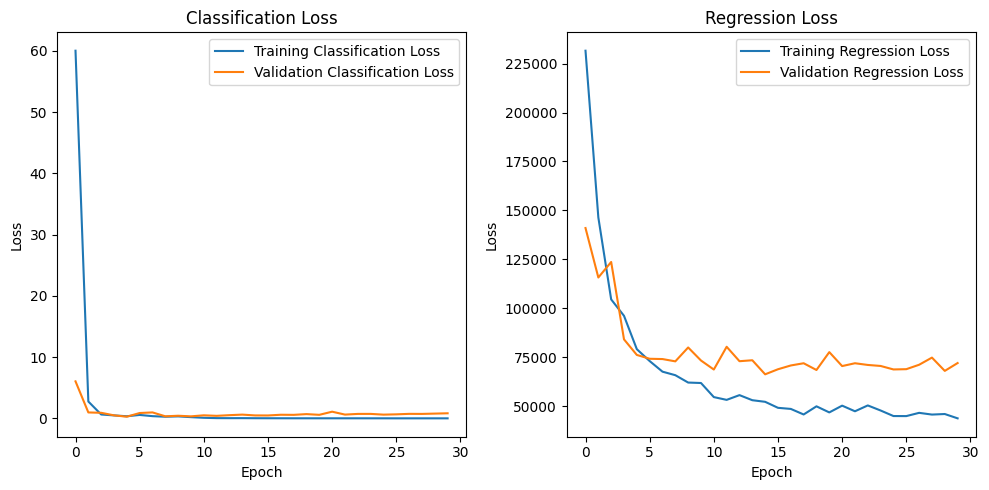

In [ ]:
import matplotlib.pyplot as plt

# Extract classification loss values from history
classification_loss = history.history['classification_output_loss']
val_classification_loss = history.history['val_classification_output_loss']

# Extract regression loss values from history
regression_loss = history.history['bbox_output_loss']
val_regression_loss = history.history['val_bbox_output_loss']

# Plot classification loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(classification_loss, label='Training Classification Loss')
plt.plot(val_classification_loss, label='Validation Classification Loss')
plt.title('Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot regression loss
plt.subplot(1, 2, 2)
plt.plot(regression_loss, label='Training Regression Loss')
plt.plot(val_regression_loss, label='Validation Regression Loss')
plt.title('Regression Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2  # Assuming you're using OpenCV to read images
import csv

# Path to the folder containing the images
images_folder = 'train_images'

# Create a folder to store the images
output_folder = 'extracted_images'
os.makedirs(output_folder, exist_ok=True)

# Read the sorted CSV file to extract image filenames
with open('train_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        # Extract filename from the first entry in the row
        filename = row[0].split(',')[0]  # Split by comma and take the first part
        image_path = os.path.join(images_folder, filename)
        if os.path.exists(image_path):
            # Read the image
            image = cv2.imread(image_path)
            # Save the image to the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, image)
            print(f"Image '{filename}' saved to '{output_folder}'")
        else:
            print(f"Image '{filename}' not found in '{images_folder}'")


Image 'filename' not found in 'train_images'
Image '1.tif' saved to 'extracted_images'
Image '2.tif' saved to 'extracted_images'
Image '3.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '4.tif' saved to 'extracted_images'
Image '5.tif' saved to 'extracted_images'
Image '5.tif' saved to 'extracted_images'
Image '6.tif' saved to 'extracted_images'
Image '7.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '8.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '9.tif' saved to 'extracted_images'
Image '10.tif' saved to 'extracted_images'
Image '10.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '11.tif' saved to 'extracted_images'
Image '12.tif' saved to '

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing the extracted images
extracted_images_folder = 'extracted_images'

# List all files in the folder
image_files = os.listdir(extracted_images_folder)

# Read each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(extracted_images_folder, image_file)
    
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Check if the image was successfully read
    if image is not None:
        print("")
    else:
        print(f"Failed to read image: {image_file}")


In [ ]:
image.shape

(214, 370, 3)

In [ ]:
import tifffile
import numpy as np
import cv2

# List to store preprocessed images
preprocessed_images = []

# Common size for resizing
new_height = 256
new_width = 256

# Loop over each image
for i in range(1, 361):
    try:
        # Load the TIFF image
        image = tifffile.imread(f"extracted_images\\{i}.tif")  # Adjust file path as needed
        
        # Resize the image to a common size
        image = cv2.resize(image, (new_width, new_height))
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    except FileNotFoundError:
        print(f"Image 'extracted_images\\{i}.tif' not found. Skipping...")

# Loop over each image
for i in range(1, 301):
    try:
        # Load the TIFF image
        image = tifffile.imread(f"extracted_images\\neg{i}.tif")  # Adjust file path as needed
        
        # Resize the image to a common size
        image = cv2.resize(image, (new_width, new_height))
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    except FileNotFoundError:
        print(f"Image 'extracted_images\\neg{i}.tif' not found. Skipping...")

# Convert the list of images to a numpy array
preprocessed_images = np.array(preprocessed_images)

# Optionally, perform further data processing (e.g., splitting the dataset)

# Print the shape of the preprocessed images array
print("Shape of preprocessed images array:", preprocessed_images.shape)


Image 'extracted_images\41.tif' not found. Skipping...
Image 'extracted_images\42.tif' not found. Skipping...
Image 'extracted_images\55.tif' not found. Skipping...
Image 'extracted_images\56.tif' not found. Skipping...
Image 'extracted_images\74.tif' not found. Skipping...
Image 'extracted_images\88.tif' not found. Skipping...
Image 'extracted_images\194.tif' not found. Skipping...
Image 'extracted_images\200.tif' not found. Skipping...
Image 'extracted_images\311.tif' not found. Skipping...
Image 'extracted_images\315.tif' not found. Skipping...
Image 'extracted_images\329.tif' not found. Skipping...
Shape of preprocessed images array: (649, 256, 256, 3)


In [ ]:
preprocessed_images

array([[[[106, 106, 106],
         [109, 109, 109],
         [112, 112, 112],
         ...,
         [112, 112, 112],
         [113, 113, 113],
         [114, 114, 114]],

        [[108, 108, 108],
         [109, 109, 109],
         [111, 111, 111],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],

        [[109, 109, 109],
         [110, 110, 110],
         [111, 111, 111],
         ...,
         [116, 116, 116],
         [114, 114, 114],
         [113, 113, 113]],

        ...,

        [[ 75,  75,  75],
         [ 68,  68,  68],
         [ 66,  66,  66],
         ...,
         [136, 136, 136],
         [141, 141, 141],
         [145, 145, 145]],

        [[ 76,  76,  76],
         [ 70,  70,  70],
         [ 68,  68,  68],
         ...,
         [135, 135, 135],
         [139, 139, 139],
         [144, 144, 144]],

        [[ 76,  76,  76],
         [ 73,  73,  73],
         [ 70,  70,  70],
         ...,
         [134, 134, 134],
        

In [ ]:
import os
import cv2
import numpy as np
import csv

# Path to the folder containing the images
images_folder = 'extracted_images'

# Dictionary to store image data
image_data = {}

# Read each image and store its data in the dictionary
for filename in os.listdir(images_folder):
    if filename.endswith('.tif'):
        image_path = os.path.join(images_folder, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # Resize image to a common size
            image = cv2.resize(image, (256, 256))  # Adjust size as needed
            image_data[filename] = image

# Read the labels file and create the array
with open('train_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file)
    data_array = []
    for row in reader:
        filename = row[0].split(',')[0]  # Extract filename from the first entry in the row
        if filename in image_data:
            data_array.append(image_data[filename])

# Convert the list of images to a numpy array
data_array = np.array(data_array)

# Print the shape of the data array
print("Shape of the data array:", data_array.shape)


Shape of the data array: (1300, 256, 256, 3)


In [ ]:
print(data_array[0])

[[[106 106 106]
  [109 109 109]
  [112 112 112]
  ...
  [112 112 112]
  [113 113 113]
  [114 114 114]]

 [[108 108 108]
  [109 109 109]
  [111 111 111]
  ...
  [114 114 114]
  [114 114 114]
  [114 114 114]]

 [[109 109 109]
  [110 110 110]
  [111 111 111]
  ...
  [116 116 116]
  [114 114 114]
  [113 113 113]]

 ...

 [[ 75  75  75]
  [ 68  68  68]
  [ 66  66  66]
  ...
  [136 136 136]
  [141 141 141]
  [145 145 145]]

 [[ 76  76  76]
  [ 70  70  70]
  [ 68  68  68]
  ...
  [135 135 135]
  [139 139 139]
  [144 144 144]]

 [[ 76  76  76]
  [ 73  73  73]
  [ 70  70  70]
  ...
  [134 134 134]
  [138 138 138]
  [143 143 143]]]


In [ ]:
data_array[1]

array([[[177, 177, 177],
        [134, 134, 134],
        [150, 150, 150],
        ...,
        [135, 135, 135],
        [136, 136, 136],
        [139, 139, 139]],

       [[166, 166, 166],
        [138, 138, 138],
        [150, 150, 150],
        ...,
        [133, 133, 133],
        [133, 133, 133],
        [137, 137, 137]],

       [[155, 155, 155],
        [142, 142, 142],
        [150, 150, 150],
        ...,
        [133, 133, 133],
        [132, 132, 132],
        [136, 136, 136]],

       ...,

       [[111, 111, 111],
        [110, 110, 110],
        [108, 108, 108],
        ...,
        [120, 120, 120],
        [119, 119, 119],
        [118, 118, 118]],

       [[112, 112, 112],
        [113, 113, 113],
        [109, 109, 109],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [119, 119, 119]],

       [[114, 114, 114],
        [116, 116, 116],
        [111, 111, 111],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [119, 119, 119]]

In [ ]:
import numpy as np

# Define the total number of images
total_images = 660  # 360 rockfall images + 300 non-rockfall images

# Define labels for rockfall images (1 for rockfall)
rockfall_labels = np.ones(1000)

# Define labels for non-rockfall images (0 for non-rockfall)
non_rockfall_labels = np.zeros(300)

# Concatenate the labels for both types of images
labels_array = np.concatenate((rockfall_labels, non_rockfall_labels))

print("Shape of labels_array:", labels_array.shape)


Shape of labels_array: (1300,)


In [ ]:
import pandas as pd

# Assuming you have preprocessed_images and labels_array defined

# Read the CSV file containing bounding box coordinates
coordinates_df = pd.read_csv("train_labels_m_sorted.csv")  # Replace "coordinates.csv" with the path to your CSV file

# Extract bounding box coordinates for the first 360 images
bounding_box_coordinates = coordinates_df[['x1', 'y1', 'x2', 'y2']]

# Flatten preprocessed_images (assuming they are 2D grayscale images)



In [ ]:
bounding_box_coordinates.shape

(1300, 4)

In [ ]:
data_array.shape

(1300, 256, 256, 3)

In [ ]:
import numpy as np

# Flatten the preprocessed images array
flattened_data = data_array.reshape(data_array.shape[0], -1)

# Combine image data, labels, and bounding box coordinates into a single dataset
data = pd.DataFrame({
    'image_data': flattened_data.tolist(),  # Convert to list for DataFrame compatibility
    'labels': labels_array.tolist(),
    'bounding_box': bounding_box_coordinates.values.tolist()  # Convert to list for DataFrame compatibility
})

# Display the first few rows of the combined dataset
print(data.head())


                                          image_data  labels  \
0  [106, 106, 106, 109, 109, 109, 112, 112, 112, ...     1.0   
1  [177, 177, 177, 134, 134, 134, 150, 150, 150, ...     1.0   
2  [126, 126, 126, 129, 129, 129, 130, 130, 130, ...     1.0   
3  [150, 150, 150, 157, 157, 157, 100, 100, 100, ...     1.0   
4  [150, 150, 150, 157, 157, 157, 100, 100, 100, ...     1.0   

                bounding_box  
0  [148, 40.0, 183.0, 125.0]  
1  [145, 63.0, 172.0, 118.0]  
2  [112, 67.0, 218.0, 122.0]  
3   [73, 71.0, 105.0, 125.0]  
4  [134, 80.0, 160.0, 135.0]  


In [ ]:
data_array

array([[[[106, 106, 106],
         [109, 109, 109],
         [112, 112, 112],
         ...,
         [112, 112, 112],
         [113, 113, 113],
         [114, 114, 114]],

        [[108, 108, 108],
         [109, 109, 109],
         [111, 111, 111],
         ...,
         [114, 114, 114],
         [114, 114, 114],
         [114, 114, 114]],

        [[109, 109, 109],
         [110, 110, 110],
         [111, 111, 111],
         ...,
         [116, 116, 116],
         [114, 114, 114],
         [113, 113, 113]],

        ...,

        [[ 75,  75,  75],
         [ 68,  68,  68],
         [ 66,  66,  66],
         ...,
         [136, 136, 136],
         [141, 141, 141],
         [145, 145, 145]],

        [[ 76,  76,  76],
         [ 70,  70,  70],
         [ 68,  68,  68],
         ...,
         [135, 135, 135],
         [139, 139, 139],
         [144, 144, 144]],

        [[ 76,  76,  76],
         [ 73,  73,  73],
         [ 70,  70,  70],
         ...,
         [134, 134, 134],
        

In [ ]:
data

,image_data,labels,bounding_box
0,"[106, 106, 106, 109, 109, 109, 112, 112, 112, ...",1.0,"[148, 40.0, 183.0, 125.0]"
1,"[177, 177, 177, 134, 134, 134, 150, 150, 150, ...",1.0,"[145, 63.0, 172.0, 118.0]"
2,"[126, 126, 126, 129, 129, 129, 130, 130, 130, ...",1.0,"[112, 67.0, 218.0, 122.0]"
3,"[150, 150, 150, 157, 157, 157, 100, 100, 100, ...",1.0,"[73, 71.0, 105.0, 125.0]"
4,"[150, 150, 150, 157, 157, 157, 100, 100, 100, ...",1.0,"[134, 80.0, 160.0, 135.0]"
...,...,...,...
1295,"[132, 132, 132, 143, 143, 143, 135, 135, 135, ...",0.0,"[nan, nan, nan, nan]"
1296,"[169, 169, 169, 163, 163, 163, 161, 161, 161, ...",0.0,"[nan, nan, nan, nan]"
1297,"[119, 119, 119, 118, 118, 118, 116, 116, 116, ...",0.0,"[nan, nan, nan, nan]"
1298,"[28, 28, 28, 24, 24, 24, 31, 31, 31, 28, 28, 2...",0.0,"[nan, nan, nan, nan]"


In [ ]:
row_data = data.iloc[0]
print(row_data)


image_data      [106, 106, 106, 109, 109, 109, 112, 112, 112, ...
labels                                                        1.0
bounding_box                            [148, 40.0, 183.0, 125.0]
Name: 0, dtype: object


In [ ]:
image_data_0 = row_data['image_data']
labels_0 = row_data['labels']
bounding_box_0 = row_data['bounding_box']

print("Image Data:", image_data_0)
print("Labels:", labels_0)
print("Bounding Box:", bounding_box_0)


Image Data: [106, 106, 106, 109, 109, 109, 112, 112, 112, 113, 113, 113, 111, 111, 111, 107, 107, 107, 105, 105, 105, 105, 105, 105, 106, 106, 106, 105, 105, 105, 104, 104, 104, 103, 103, 103, 100, 100, 100, 99, 99, 99, 99, 99, 99, 100, 100, 100, 101, 101, 101, 98, 98, 98, 107, 107, 107, 110, 110, 110, 108, 108, 108, 110, 110, 110, 105, 105, 105, 106, 106, 106, 115, 115, 115, 124, 124, 124, 119, 119, 119, 114, 114, 114, 114, 114, 114, 111, 111, 111, 118, 118, 118, 110, 110, 110, 108, 108, 108, 103, 103, 103, 103, 103, 103, 105, 105, 105, 104, 104, 104, 112, 112, 112, 107, 107, 107, 109, 109, 109, 109, 109, 109, 111, 111, 111, 114, 114, 114, 117, 117, 117, 120, 120, 120, 121, 121, 121, 119, 119, 119, 117, 117, 117, 117, 117, 117, 119, 119, 119, 119, 119, 119, 116, 116, 116, 117, 117, 117, 117, 117, 117, 116, 116, 116, 113, 113, 113, 114, 114, 114, 111, 111, 111, 108, 108, 108, 107, 107, 107, 107, 107, 107, 106, 106, 106, 104, 104, 104, 104, 104, 104, 101, 101, 101, 104, 104, 104, 103, 1

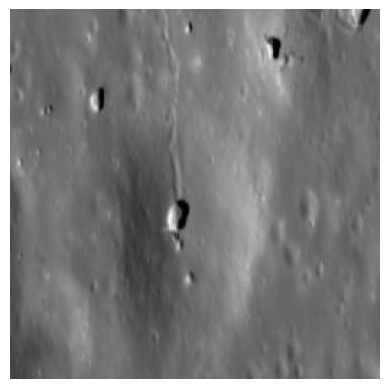

In [ ]:
import numpy as np

# Convert the list to a NumPy array
image_data_array = np.array(image_data_0)

# Reshape the array to the desired shape
image_data_reshaped = image_data_array.reshape((256, 256, 3))

# Display the reshaped image using Matplotlib
plt.imshow(image_data_reshaped)
plt.axis('off')
plt.show()


In [ ]:
import tifffile
import numpy as np
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

bounding_box_coordinates.fillna(0, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17492\4090793009.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bounding_box_coordinates.fillna(0, inplace=True)


In [33]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [34]:
from sklearn.model_selection import train_test_split

# Assuming you have your image data stored in 'data_array' and labels in 'labels_array'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data_array, labels_array, test_size=0.2, random_state=42)

# Optionally, you can also split the bounding box coordinates if needed
# bounding_box_train, bounding_box_test = train_test_split(bounding_box_coordinates, test_size=0.2, random_state=42)

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(X_train, y_train, epochs=12, batch_size=26, validation_split=0.2)


Epoch 1/12
32/32 [==============================] - 62s 2s/step - loss: 45.9019 - accuracy: 0.6322 - val_loss: 0.5566 - val_accuracy: 0.7740
Epoch 2/12
32/32 [==============================] - 57s 2s/step - loss: 0.4756 - accuracy: 0.7897 - val_loss: 0.5004 - val_accuracy: 0.7788
Epoch 3/12
32/32 [==============================] - 56s 2s/step - loss: 0.8571 - accuracy: 0.7200 - val_loss: 0.5641 - val_accuracy: 0.7788
Epoch 4/12
32/32 [==============================] - 56s 2s/step - loss: 0.4613 - accuracy: 0.8209 - val_loss: 0.4398 - val_accuracy: 0.8173
Epoch 5/12
32/32 [==============================] - 56s 2s/step - loss: 0.4790 - accuracy: 0.8377 - val_loss: 0.5111 - val_accuracy: 0.8125
Epoch 6/12
32/32 [==============================] - 56s 2s/step - loss: 0.3059 - accuracy: 0.8942 - val_loss: 0.6581 - val_accuracy: 0.8125
Epoch 7/12
32/32 [==============================] - 56s 2s/step - loss: 0.7181 - accuracy: 0.8582 - val_loss: 0.5720 - val_accuracy: 0.7644
Epoch 8/12
32/32 [=

In [61]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)


9/9 [==============================] - 4s 355ms/step - loss: 0.4237 - accuracy: 0.8462
Test Accuracy: 0.8461538553237915


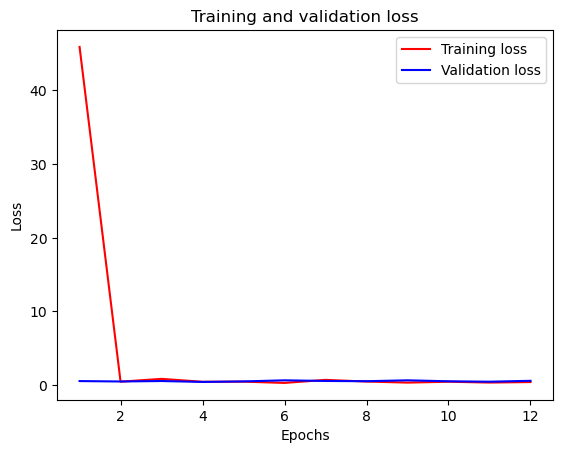

In [39]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss values
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [40]:
import cv2
import os

# Folder containing test and neg images
folder_path = 'test_images'

# List to store images
images = []

# Loop through test images
for i in range(1, 19):
    file_path = os.path.join(folder_path, f'test{i}.tif')
    if os.path.exists(file_path):
        img = cv2.imread(file_path)
        images.append(img)

# Loop through neg images
for i in range(1, 17):
    file_path = os.path.join(folder_path, f'neg{i}.tif')
    if os.path.exists(file_path):
        img = cv2.imread(file_path)
        images.append(img)

# Now, images list contains all the images from the folder


In [41]:
images

[array([[[142, 142, 142],
         [148, 148, 148],
         [156, 156, 156],
         ...,
         [ 87,  87,  87],
         [ 88,  88,  88],
         [ 89,  89,  89]],
 
        [[126, 126, 126],
         [130, 130, 130],
         [139, 139, 139],
         ...,
         [ 89,  89,  89],
         [ 90,  90,  90],
         [ 91,  91,  91]],
 
        [[130, 130, 130],
         [127, 127, 127],
         [124, 124, 124],
         ...,
         [ 87,  87,  87],
         [ 87,  87,  87],
         [ 88,  88,  88]],
 
        ...,
 
        [[ 84,  84,  84],
         [ 84,  84,  84],
         [ 84,  84,  84],
         ...,
         [ 73,  73,  73],
         [ 76,  76,  76],
         [ 80,  80,  80]],
 
        [[ 83,  83,  83],
         [ 84,  84,  84],
         [ 86,  86,  86],
         ...,
         [ 73,  73,  73],
         [ 75,  75,  75],
         [ 79,  79,  79]],
 
        [[ 81,  81,  81],
         [ 83,  83,  83],
         [ 86,  86,  86],
         ...,
         [ 75,  75,  75],
  

In [42]:
import csv
import re

# Function to extract the numeric part of the file name
def get_numeric_part(filename):
    match = re.match(r"(\D+)?(\d+)\.tif", filename)
    if match:
        prefix = match.group(1) or ""
        number = int(match.group(2))
        # If the prefix is 'neg', adjust the number to start from 361
        if prefix.lower() == 'neg':
            number += 360
        return number
    else:
        return float('inf')  # Return a very large number for non-matching file names

# Read the data from the CSV file
with open('test_labels_m.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')  # Assuming tab-separated data
    header = next(reader)  # Read and store the header row
    rows = list(reader)

# Sort the data based on the numeric part of the file name
sorted_rows = sorted(rows, key=lambda x: get_numeric_part(x[0]))

# Write the sorted data back to the CSV file
with open('test_labels_m_sorted.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter='\t')  # Assuming tab-separated data
    writer.writerow(header)  # Write the header row
    writer.writerows(sorted_rows)


In [43]:
import os
import cv2  # Assuming you're using OpenCV to read images
import csv

# Path to the folder containing the images
images_folder = 'test_images'

# Create a folder to store the images
output_folder = 'extracted_test_images'
os.makedirs(output_folder, exist_ok=True)

# Read the sorted CSV file to extract image filenames
with open('test_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        # Extract filename from the first entry in the row
        filename = row[0].split(',')[0]  # Split by comma and take the first part
        image_path = os.path.join(images_folder, filename)
        if os.path.exists(image_path):
            # Read the image
            image = cv2.imread(image_path)
            # Save the image to the output folder
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, image)
            print(f"Image '{filename}' saved to '{output_folder}'")
        else:
            print(f"Image '{filename}' not found in '{images_folder}'")


Image 'filename' not found in 'test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test1.tif' saved to 'extracted_test_images'
Image 'test2.tif' saved to 'extracted_test_images'
Image 'test2.tif' saved to 'extracted_test_images'
Image 'test2.tif' saved to 'extracted_test_images'
Image 'test2.tif' saved to 'extracted_test_images'
Image 'test2.tif' saved to 'extracted_test_images'
Image 'test2.tif' saved to 'extracted_

In [48]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the folder containing the extracted images
extracted_images_folder = 'extracted_test_images'

# List all files in the folder
image_files = os.listdir(extracted_images_folder)

# Read each image
for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(extracted_images_folder, image_file)
    
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Check if the image was successfully read
    if image is not None:
        print("")
    else:
        print(f"Failed to read image: {image_file}")


In [50]:
image.shape

(857, 1581, 3)

In [52]:
import tifffile
import numpy as np
import cv2

# List to store preprocessed images
preprocessed_images = []

# Common size for resizing
new_height = 256
new_width = 256

# Loop over each image
for i in range(1, 19):
    try:
        # Load the TIFF image
        image = tifffile.imread(f"extracted_test_images\\test{i}.tif")  # Adjust file path as needed
        
        # Resize the image to a common size
        image = cv2.resize(image, (new_width, new_height))
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    except FileNotFoundError:
        print(f"Image 'extracted_test_images\\test{i}.tif' not found. Skipping...")

# Loop over each image
for i in range(1, 17):
    try:
        # Load the TIFF image
        image = tifffile.imread(f"extracted_test_images\\neg{i}.tif")  # Adjust file path as needed
        
        # Resize the image to a common size
        image = cv2.resize(image, (new_width, new_height))
        
        # Add the preprocessed image to the list
        preprocessed_images.append(image)
    except FileNotFoundError:
        print(f"Image 'extracted_test_images\\neg{i}.tif' not found. Skipping...")

# Convert the list of images to a numpy array
preprocessed_images = np.array(preprocessed_images)

# Optionally, perform further data processing (e.g., splitting the dataset)

# Print the shape of the preprocessed images array
print("Shape of preprocessed images array:", preprocessed_images.shape)


Image 'extracted_test_images\test7.tif' not found. Skipping...
Shape of preprocessed images array: (33, 256, 256, 3)


In [53]:
preprocessed_images

array([[[[142, 142, 142],
         [146, 146, 146],
         [128, 128, 128],
         ...,
         [ 84,  84,  84],
         [ 91,  91,  91],
         [ 89,  89,  89]],

        [[116, 116, 116],
         [132, 132, 132],
         [136, 136, 136],
         ...,
         [ 92,  92,  92],
         [ 89,  89,  89],
         [ 82,  82,  82]],

        [[128, 128, 128],
         [117, 117, 117],
         [127, 127, 127],
         ...,
         [ 89,  89,  89],
         [ 90,  90,  90],
         [ 81,  81,  81]],

        ...,

        [[ 91,  91,  91],
         [ 88,  88,  88],
         [ 84,  84,  84],
         ...,
         [ 81,  81,  81],
         [ 77,  77,  77],
         [ 87,  87,  87]],

        [[ 92,  92,  92],
         [ 89,  89,  89],
         [ 93,  93,  93],
         ...,
         [ 80,  80,  80],
         [ 75,  75,  75],
         [ 80,  80,  80]],

        [[ 87,  87,  87],
         [ 93,  93,  93],
         [ 99,  99,  99],
         ...,
         [ 83,  83,  83],
        

In [54]:
import os
import cv2
import numpy as np
import csv

# Path to the folder containing the images
images_folder = 'extracted_test_images'

# Dictionary to store image data
image_data = {}

# Read each image and store its data in the dictionary
for filename in os.listdir(images_folder):
    if filename.endswith('.tif'):
        image_path = os.path.join(images_folder, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # Resize image to a common size
            image = cv2.resize(image, (256, 256))  # Adjust size as needed
            image_data[filename] = image

# Read the labels file and create the array
with open('test_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file)
    data_array = []
    for row in reader:
        filename = row[0].split(',')[0]  # Extract filename from the first entry in the row
        if filename in image_data:
            data_array.append(image_data[filename])

# Convert the list of images to a numpy array
data_array = np.array(data_array)

# Print the shape of the data array
print("Shape of the data array:", data_array.shape)


Shape of the data array: (100, 256, 256, 3)


In [55]:
import numpy as np

# Define the total number of images
total_images = 34  # 360 rockfall images + 300 non-rockfall images

# Define labels for rockfall images (1 for rockfall)
rockfall_labels = np.ones(83)

# Define labels for non-rockfall images (0 for non-rockfall)
non_rockfall_labels = np.zeros(17)

# Concatenate the labels for both types of images
labels_array = np.concatenate((rockfall_labels, non_rockfall_labels))

print("Shape of labels_array:", labels_array.shape)
labels_array


Shape of labels_array: (100,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
import pandas as pd

# Assuming you have preprocessed_images and labels_array defined

# Read the CSV file containing bounding box coordinates
coordinates_df = pd.read_csv("test_labels_m_sorted.csv")  # Replace "coordinates.csv" with the path to your CSV file

# Extract bounding box coordinates for the first 360 images
bounding_box_coordinates = coordinates_df[['x1', 'y1', 'x2', 'y2']]

# Flatten preprocessed_images (assuming they are 2D grayscale images)



In [58]:
import os
import cv2
import numpy as np
import csv

# Path to the folder containing the images
images_folder = 'extracted_test_images'

# Dictionary to store image data
image_data = {}

# Read each image and store its data in the dictionary
for filename in os.listdir(images_folder):
    if filename.endswith('.tif'):
        image_path = os.path.join(images_folder, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # Resize image to a common size
            image = cv2.resize(image, (256, 256))  # Adjust size as needed
            image_data[filename] = image

# Read the labels file and create the array
with open('test_labels_m_sorted.csv', 'r') as file:
    reader = csv.reader(file)
    data_array = []
    for row in reader:
        filename = row[0].split(',')[0]  # Extract filename from the first entry in the row
        if filename in image_data:
            data_array.append(image_data[filename])

# Convert the list of images to a numpy array
data_array = np.array(data_array)

# Print the shape of the data array
print("Shape of the data array:", data_array.shape)


Shape of the data array: (100, 256, 256, 3)


In [59]:
data_array

array([[[[142, 142, 142],
         [146, 146, 146],
         [128, 128, 128],
         ...,
         [ 84,  84,  84],
         [ 91,  91,  91],
         [ 89,  89,  89]],

        [[116, 116, 116],
         [132, 132, 132],
         [136, 136, 136],
         ...,
         [ 92,  92,  92],
         [ 89,  89,  89],
         [ 82,  82,  82]],

        [[128, 128, 128],
         [117, 117, 117],
         [127, 127, 127],
         ...,
         [ 89,  89,  89],
         [ 90,  90,  90],
         [ 81,  81,  81]],

        ...,

        [[ 91,  91,  91],
         [ 88,  88,  88],
         [ 84,  84,  84],
         ...,
         [ 81,  81,  81],
         [ 77,  77,  77],
         [ 87,  87,  87]],

        [[ 92,  92,  92],
         [ 89,  89,  89],
         [ 93,  93,  93],
         ...,
         [ 80,  80,  80],
         [ 75,  75,  75],
         [ 80,  80,  80]],

        [[ 87,  87,  87],
         [ 93,  93,  93],
         [ 99,  99,  99],
         ...,
         [ 83,  83,  83],
        

In [62]:
test_loss, test_acc = model.evaluate(data_array, labels_array)
print('Test Accuracy:', test_acc)


4/4 [==============================] - 2s 305ms/step - loss: 0.4677 - accuracy: 0.8400
Test Accuracy: 0.8399999737739563
